In [31]:
import numpy as np
import glob
import matplotlib.pyplot as plt

name_file = "stuffed_toys_ms"


images = glob.glob(f'{name_file}/*.png')
images.sort()

for i in range(len(images)):
    img = plt.imread(images[i])
    if i == 0:
        stacked = img
    else:
        stacked = np.dstack((stacked,img))

stacked.shape

(512, 512, 31)

In [32]:
from spec2rgb import COLOR_SPACE
print("Allowed color spaces", list(COLOR_SPACE.keys()))

Allowed color spaces ['sRGB', 'AdobeRGB', 'AppleRGB', 'UHDTV', 'CIERGB']


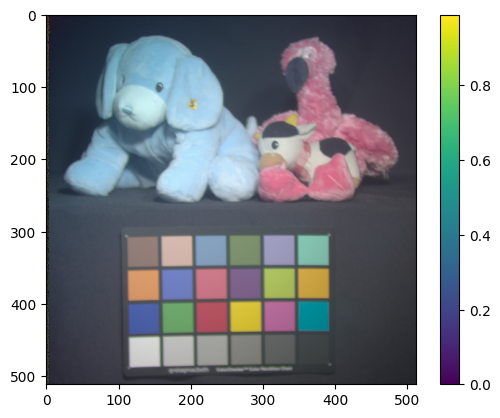

In [33]:
from spec2rgb import ColourSystem

color_space = "sRGB"
start, end = 400, 700 
number_bands = 31

cs = ColourSystem(cs=color_space, start=start, end=end, num=number_bands)

img_rgb = cs.spec_to_rgb(stacked)

img_rgb = np.clip(img_rgb, 0, 1)

#post processing, because the image is too dark
img_rgb = img_rgb ** 0.3

plt.imshow(img_rgb)
plt.colorbar()
plt.show()

In [34]:
plt.imsave(f'created_images_rgb/{name_file}.png', img_rgb)

send image to model in hugginface with transformers library

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


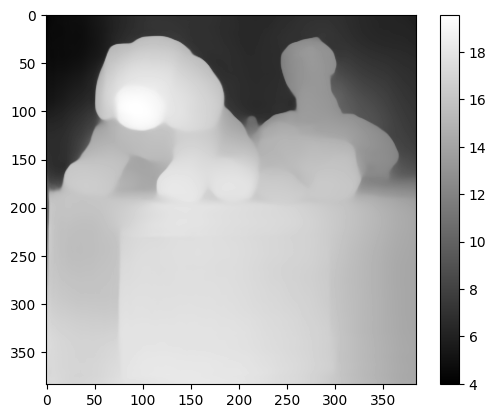

In [35]:
from transformers import pipeline
from PIL import Image

estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

img_rgb = Image.fromarray((img_rgb * 255).astype(np.uint8))

result = estimator(images = img_rgb)

plt.imshow(result["predicted_depth"].squeeze(), cmap="gray")
plt.colorbar()

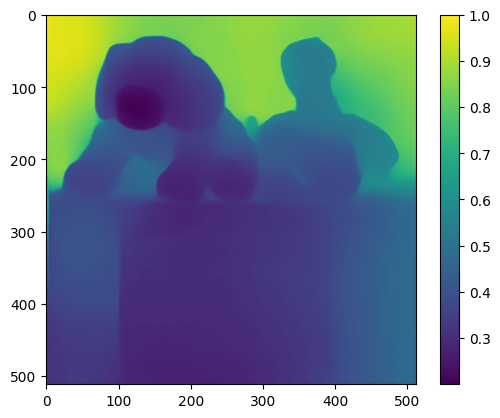

In [36]:
a = plt.imread(f"estimated_images/{name_file}.png")

plt.imshow( ( 1-a ) + a.min() )
plt.colorbar()